# Logistic Regression Demo

In the example below, we will use the breast cancer wisconsin dataset found in the datasets package in Python.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Datasets

In [2]:
from sklearn.datasets import load_breast_cancer
Cancer = load_breast_cancer()
print (Cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# reset data to DataFrame
df = pd.DataFrame(Cancer.data)

# label columns
df.columns = Cancer.feature_names

# Set type column for target
df['Type'] = Cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

## Primary Visualization 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


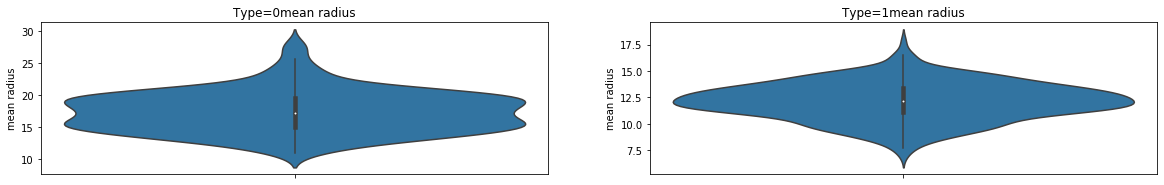

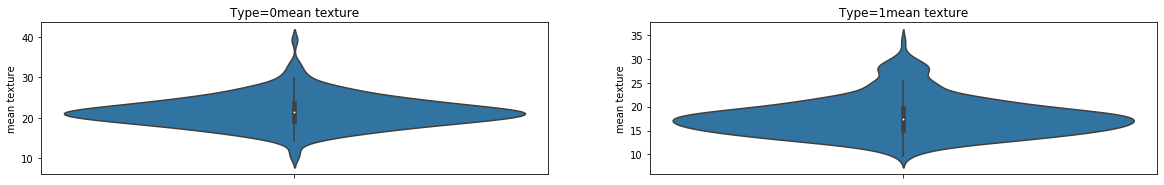

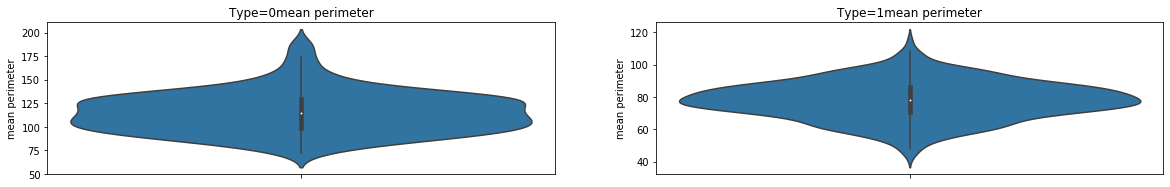

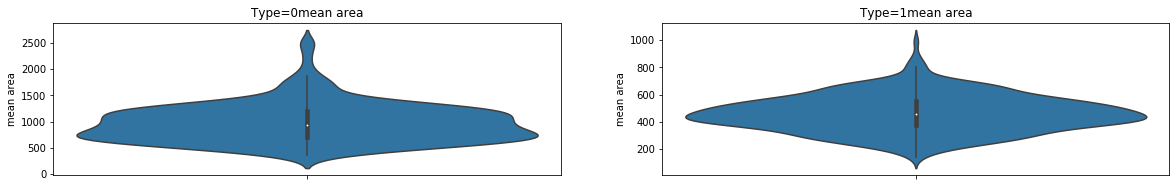

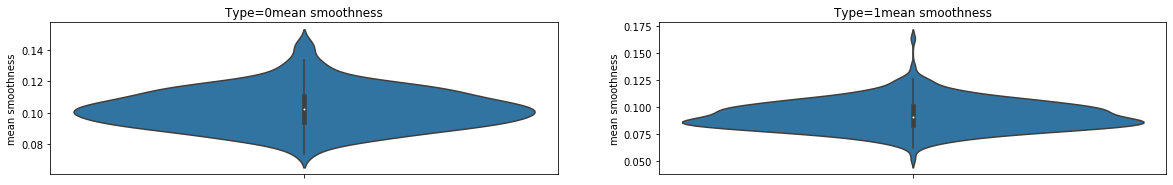

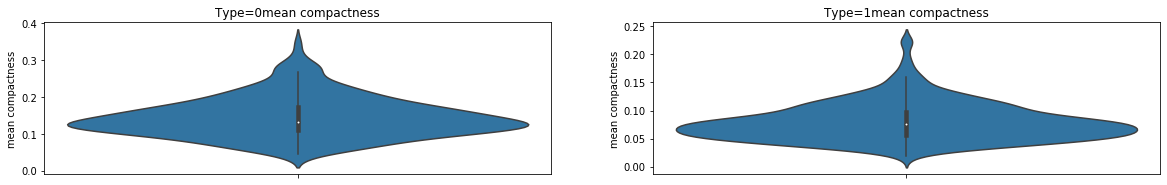

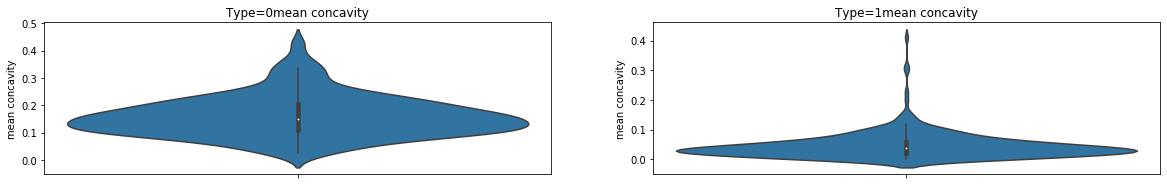

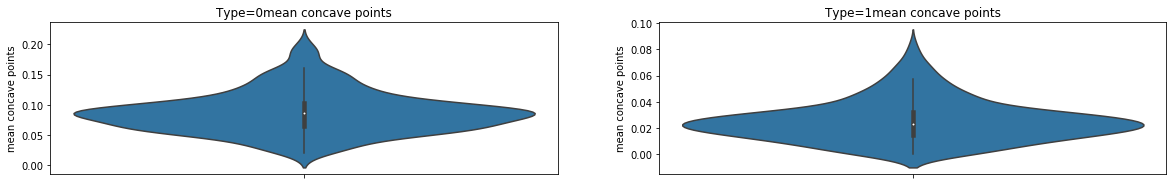

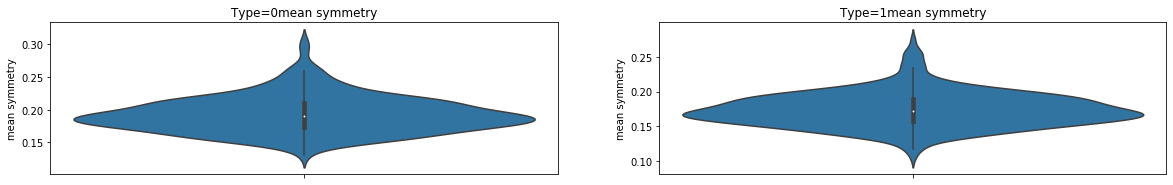

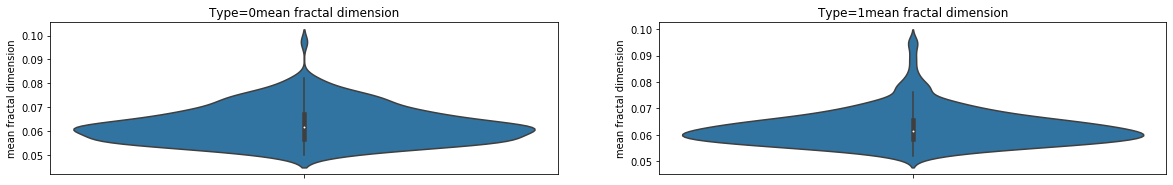

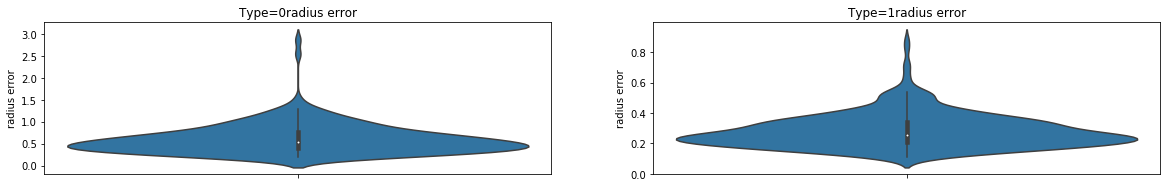

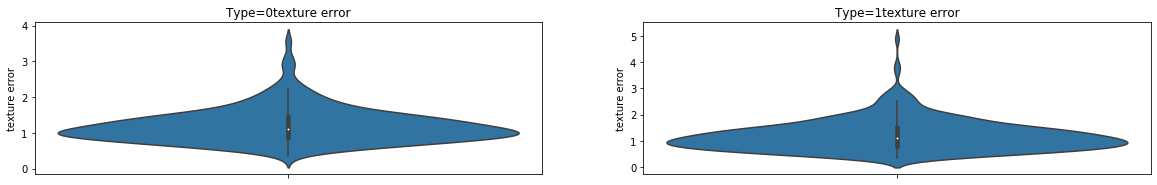

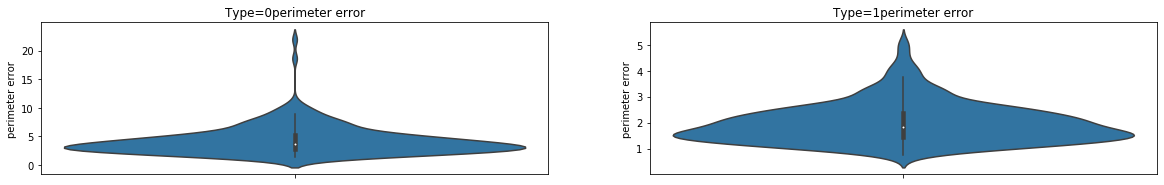

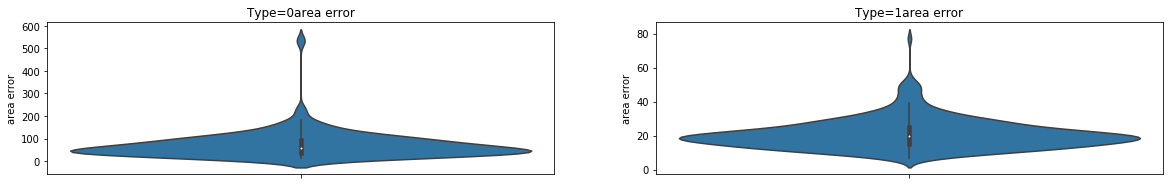

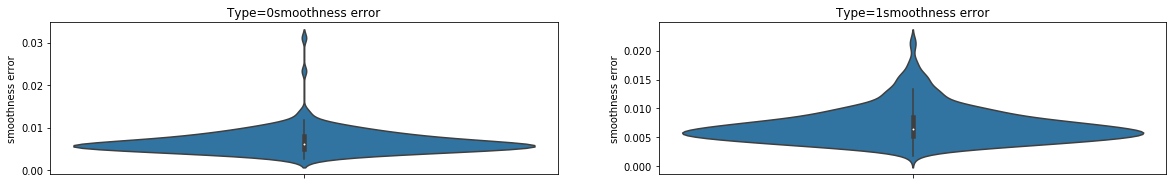

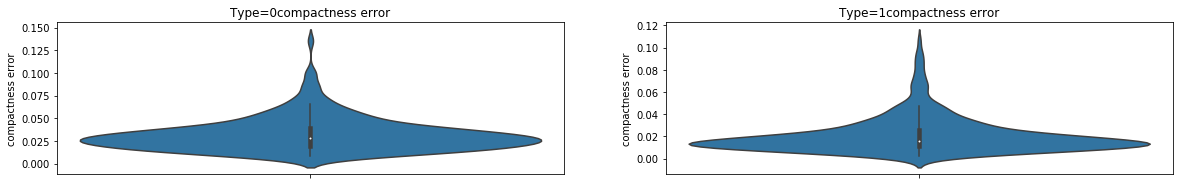

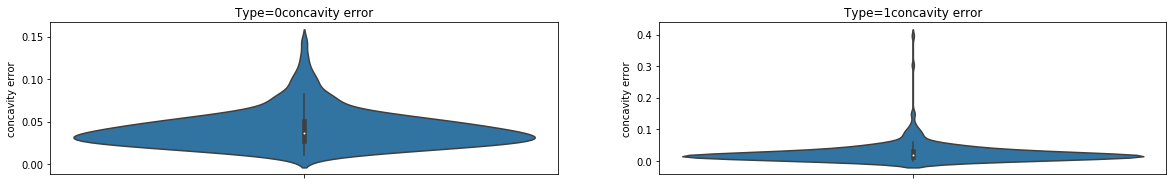

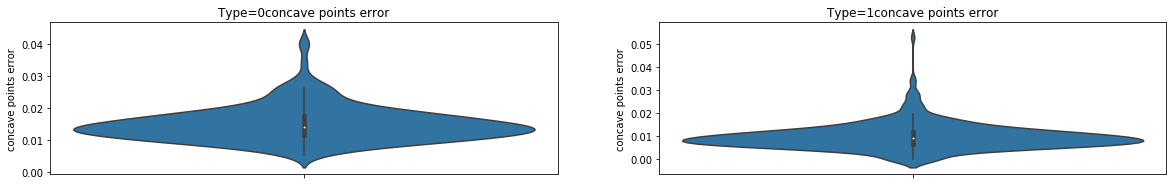

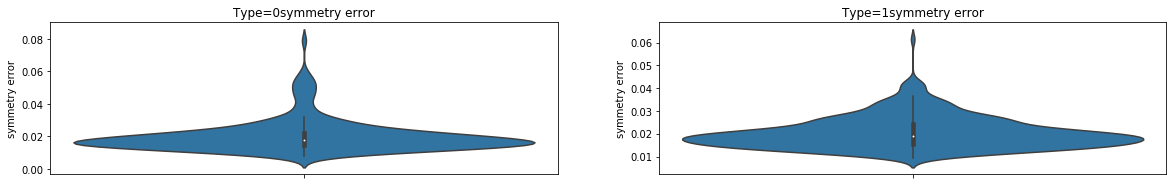

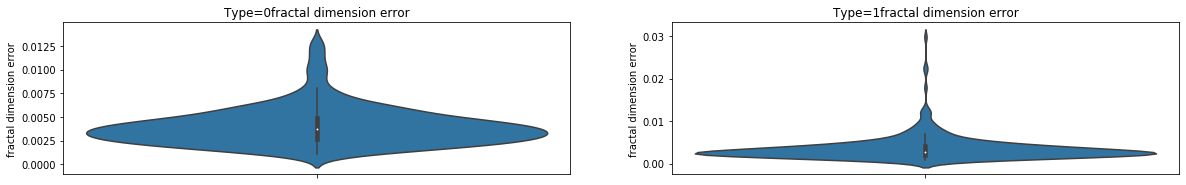

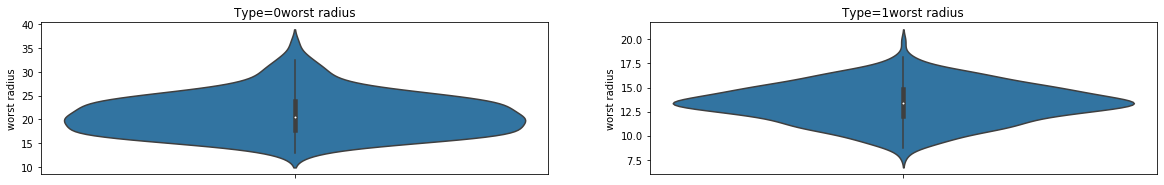

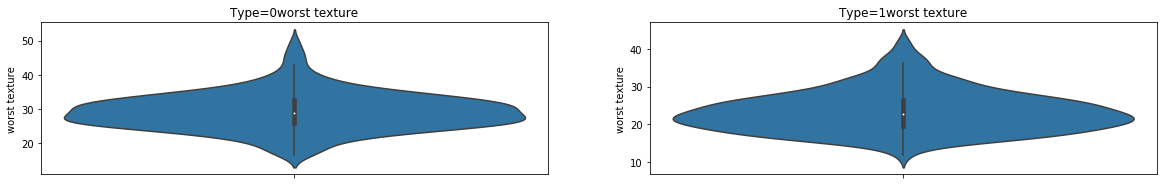

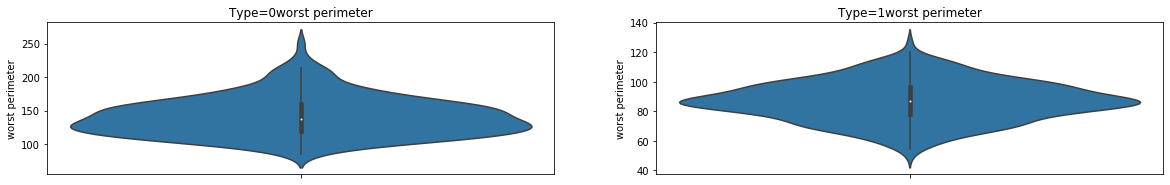

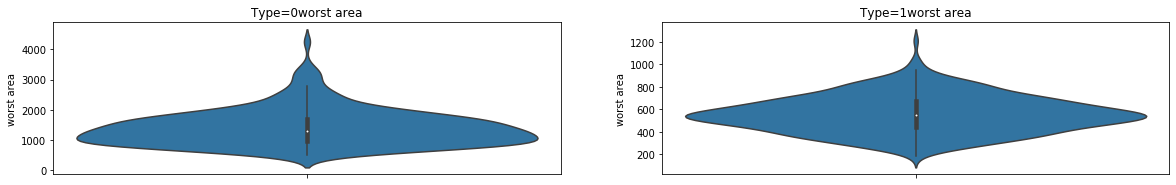

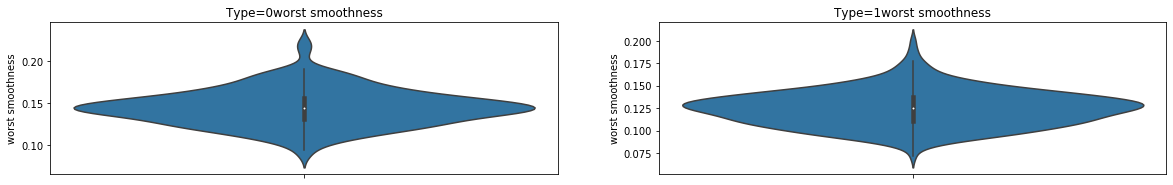

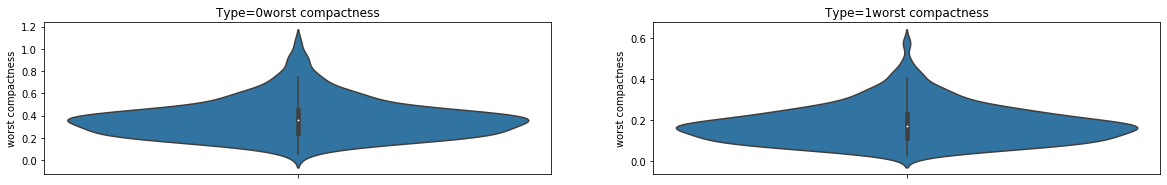

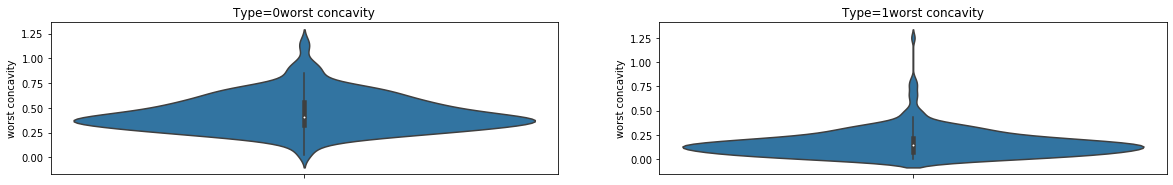

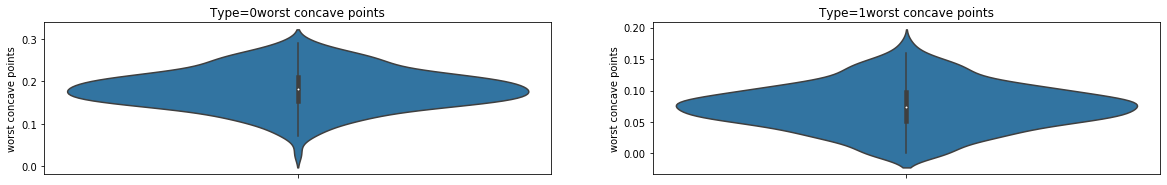

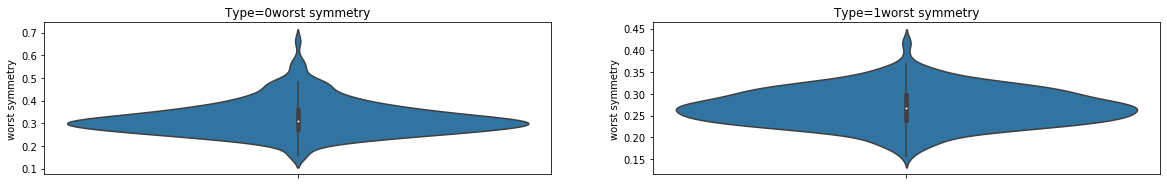

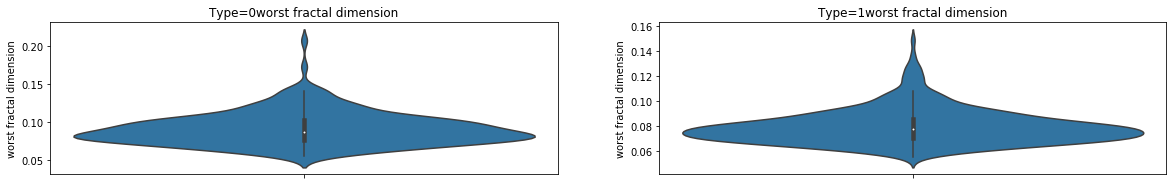

In [5]:
count=1
for i in range(len(df.columns)-1):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(df.columns)-1,2,count)#每一横行画两幅图
    sns.violinplot(y=df.columns[i],data=df[df.Type==0])
    plt.title("Type=0"+df.columns[i])
    
    plt.subplot(len(df.columns)-1,2,count+1)
    sns.violinplot(y=df.columns[i],data=df[df.Type==1])
    plt.title("Type=1"+df.columns[i])
    count+=2


We can tell that in some features the distribution are different between type 0 and type 1.

In [6]:
df.Type.value_counts()
# 1-Benign 0-Nalignant

1    357
0    212
Name: Type, dtype: int64

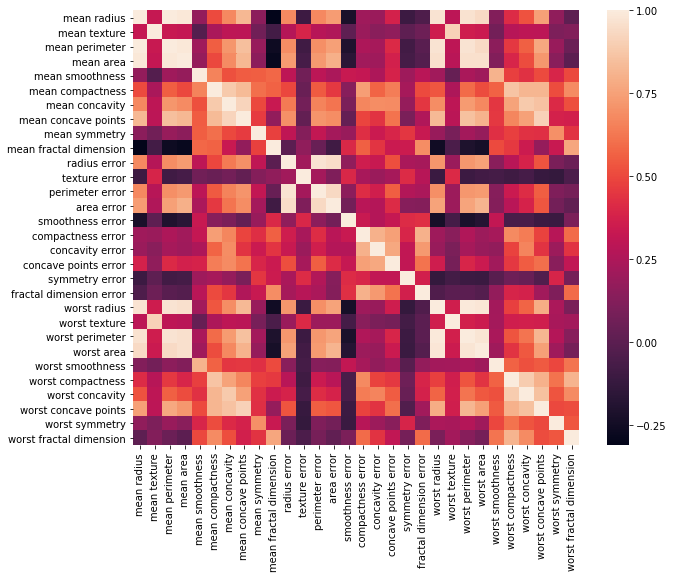

In [7]:
# Correlation Matrix
corrmat = df.drop('Type',axis=1).corr()
plt.figure(figsize = (10,8))
sns.heatmap(data=corrmat,annot=False)
plt.show()

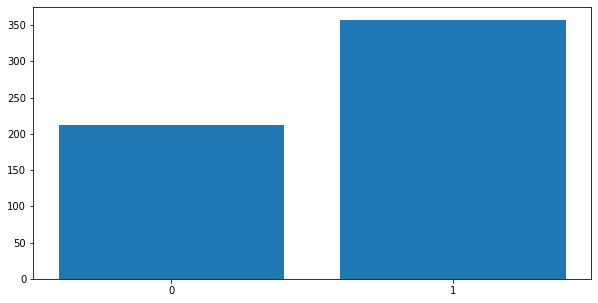

In [9]:
#plot bar plot to see the amounts of 0 and 1
fig = plt.figure(figsize=(10,5))
plt.bar(df['Type'].value_counts().index,df['Type'].value_counts().values)
plt.xticks(df['Type'].value_counts().index)
plt.show()

# Use Scikit-Learn to build a Logistic Regression Model

In [21]:
# Import Linear Regression Package
import sklearn
from sklearn.linear_model import LogisticRegression

In [22]:
# Data Matrix
X = df.drop('Type',axis=1)

# Targets
Y = df.Type

In [24]:
# Train-Test Split to validate the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
# Print shapes of the training and testing data sets
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [26]:
# Create a LogisticRegression Object
lgr = LogisticRegression()

In [27]:
# Implement Linear Regression
lgr.fit(X_train,Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
# Show the coefficient of each column
coeff = pd.DataFrame(df.columns)
coeff.columns = ["Features"]
coeff["Coefficient Estimate"] = pd.Series(lgr.coef_[0])
coeff

,Features,Coefficient Estimate
0,mean radius,1.761874
1,mean texture,0.317966
2,mean perimeter,0.154440
3,mean area,-0.016705
4,mean smoothness,-0.117715
5,mean compactness,-0.331500
6,mean concavity,-0.563055
7,mean concave points,-0.274920
8,mean symmetry,-0.165225
9,mean fractal dimension,-0.024607


In [28]:
# Predictions on training set and testing set by using the fitted logistic model
pred_train = lgr.predict(X_train)
pred_test = lgr.predict(X_test)

In [29]:
# Use Accuracy to evaluate our model
from sklearn import metrics
print("Accuracy on Training Dataset is %.2f" %metrics.accuracy_score(Y_train, pred_train))
print("Accuracy on Testing Dataset is %.2f" %metrics.accuracy_score(Y_test, pred_test))

Accuracy on Training Dataset is 0.97
Accuracy on Testing Dataset is 0.94
